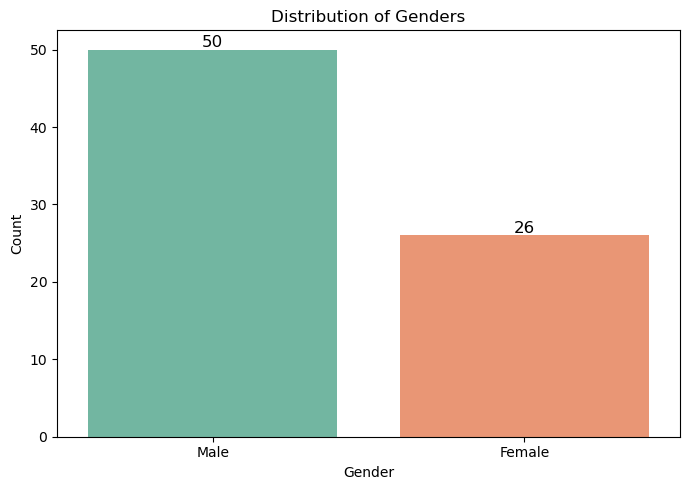

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure and subplots
plt.figure(figsize=(7, 5))

# Create a bar chart for the distribution of genders
sns.countplot(data=df, x="Gender", palette="Set2")

# Add count labels above the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Customize the plot
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Genders")

# Show the plot
plt.tight_layout()
plt.show()


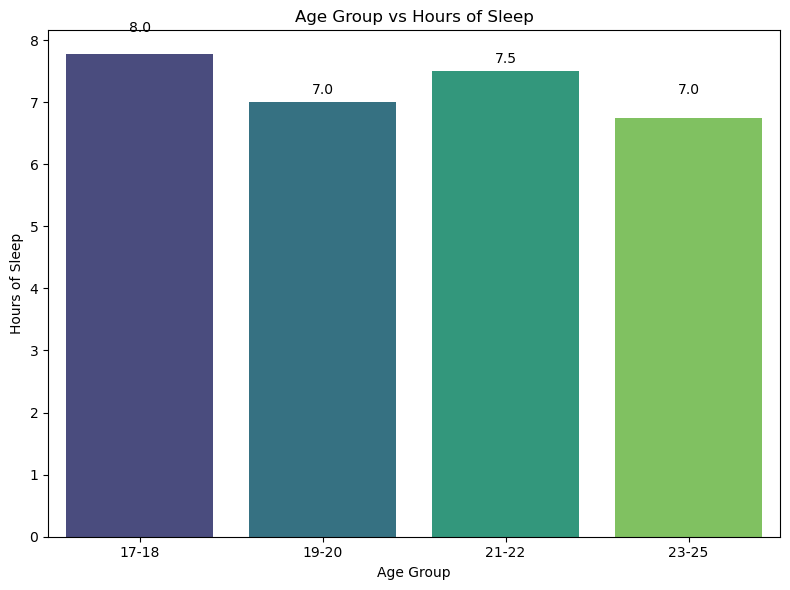

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Define the age ranges and corresponding labels
age_ranges = [(17, 18), (19, 20), (21, 22), (23, 25)]
age_labels = ["17-18", "19-20", "21-22", "23-25"]

# Add a new column for age groups
def get_age_group(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            return age_labels[i]
    return "Unknown"

df["Age Group"] = df["Age"].apply(get_age_group)

# Sort the DataFrame by age group
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_labels, ordered=True)
df = df.sort_values(by='Age Group')

# Set up the figure and subplot
plt.figure(figsize=(8, 6))

# Create a bar chart for Age Group vs Hours of Sleep
ax = sns.barplot(data=df, x="Age Group", y="How much hours of sleep you usually get? ", ci=None, palette="viridis")

# Add rounded labels at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        height = round(height * 2) / 2  # Round to nearest 0.5
        ax.annotate(format(height, '.1f'), 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Customize the plot
plt.xlabel("Age Group")
plt.ylabel("Hours of Sleep")
plt.title("Age Group vs Hours of Sleep")

# Show the plot
plt.tight_layout()
plt.show()


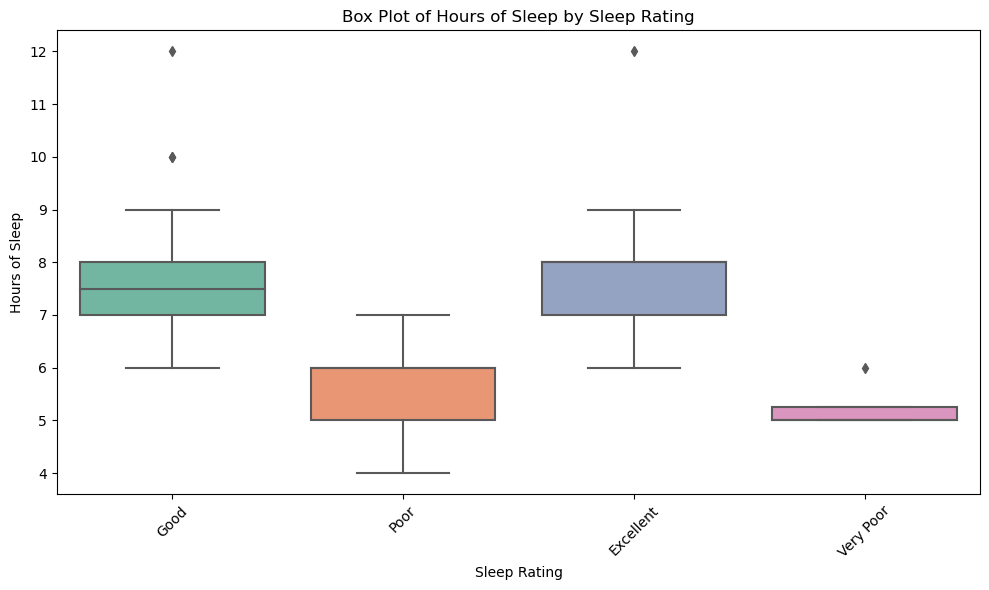

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot of Hours of Sleep for each Sleep Rating
sns.boxplot(data=df, x="How will you rate your sleep?", y="How much hours of sleep you usually get? ", palette="Set2")

# Customize the plot
plt.xlabel("Sleep Rating")
plt.ylabel("Hours of Sleep")
plt.title("Box Plot of Hours of Sleep by Sleep Rating")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()




<Figure size 1000x600 with 0 Axes>

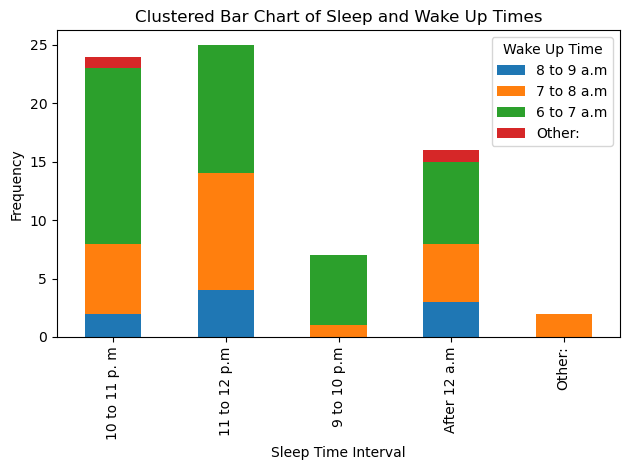

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Define mapping of interval values to time values (approximate)
interval_to_time = {
    "6 to 7 a.m": "06:30",
    "7 to 8 a.m": "07:30",
    "8 to 9 a.m": "08:30",
    "9 to 10 a.m": "09:30",
    "10 to 11 a.m": "10:30",
    "11 to 12 p.m": "11:30",
    "12 to 1 p.m": "12:30",
    "After 12 a.m": "00:30",
    "Other:": None  # Handle 'Other' or missing values as needed
}

# Convert interval values to time values for both columns
df["Sleep Time"] = df["At what time you usually sleep?"].map(interval_to_time)
df["Wake Up Time"] = df["When do you usually wake up?"].map(interval_to_time)

# Convert Sleep Time and Wake Up Time to datetime objects
df["Sleep Time"] = pd.to_datetime(df["Sleep Time"], format="%H:%M", errors="coerce")
df["Wake Up Time"] = pd.to_datetime(df["Wake Up Time"], format="%H:%M", errors="coerce")

# Filter out "8 to 9 p.m" time interval
df = df[df["At what time you usually sleep?"] != "8 to 9 p.m"]

# Set up the figure
plt.figure(figsize=(10, 6))

# Group data by interval and calculate the count of sleep and wake-up times
grouped = df.groupby(["At what time you usually sleep?", "When do you usually wake up?"]).size().unstack()

# Sort the columns in ascending order based on Sleep Time
sorted_cols = (
    grouped.iloc[:, :-1].sum(axis=0).sort_values().index.tolist() + ["Other:"]
)
grouped = grouped[sorted_cols]

# Plot a clustered bar chart
grouped.plot(kind="bar", stacked=True)

# Customize the plot
plt.xlabel("Sleep Time Interval")
plt.ylabel("Frequency")
plt.title("Clustered Bar Chart of Sleep and Wake Up Times")
plt.legend(title="Wake Up Time")

# Show the plot
plt.tight_layout()
plt.show()


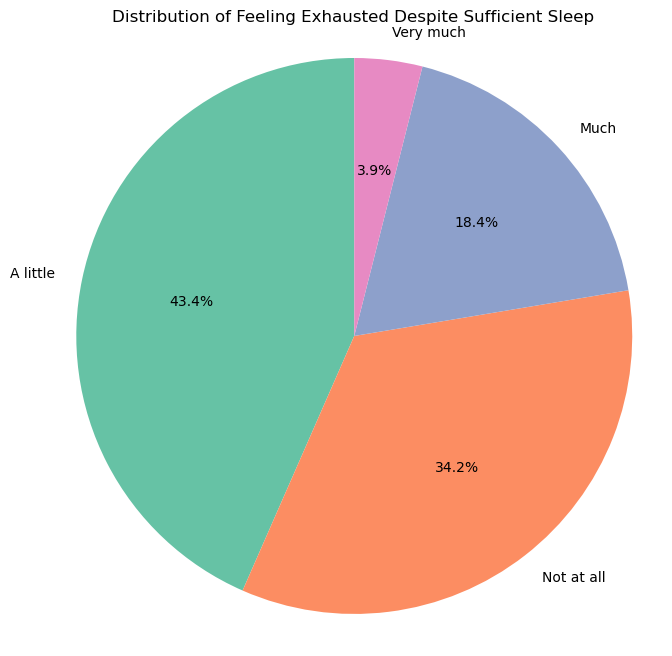

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Calculate the distribution of responses
response_counts = df["Inspite of having sufficient sleep, do you feel exhausted during the day?"].value_counts()

# Set up the figure and subplot
plt.figure(figsize=(8, 8))

# Create a pie chart with starting angle of 90 degrees
plt.pie(response_counts, labels=response_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=90)

# Customize the plot
plt.title("Distribution of Feeling Exhausted Despite Sufficient Sleep")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()




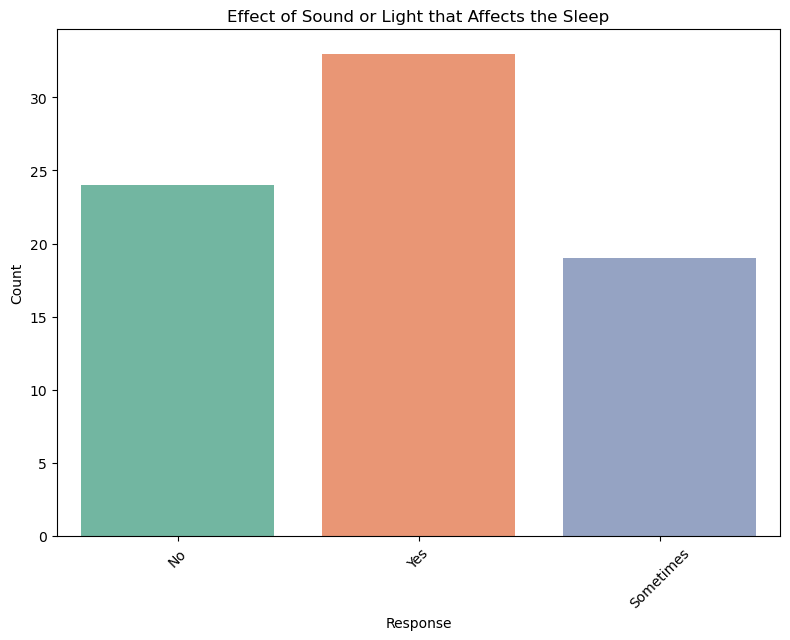

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure and subplot
plt.figure(figsize=(8, 6))

# Create a count plot for "Does the presence of sound or light affect your sleep?"
sns.countplot(data=df, x="Does the presence of sound or light affect you sleep? ", palette="Set2")

# Customize the plot
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Effect of Sound or Light that Affects the Sleep")

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


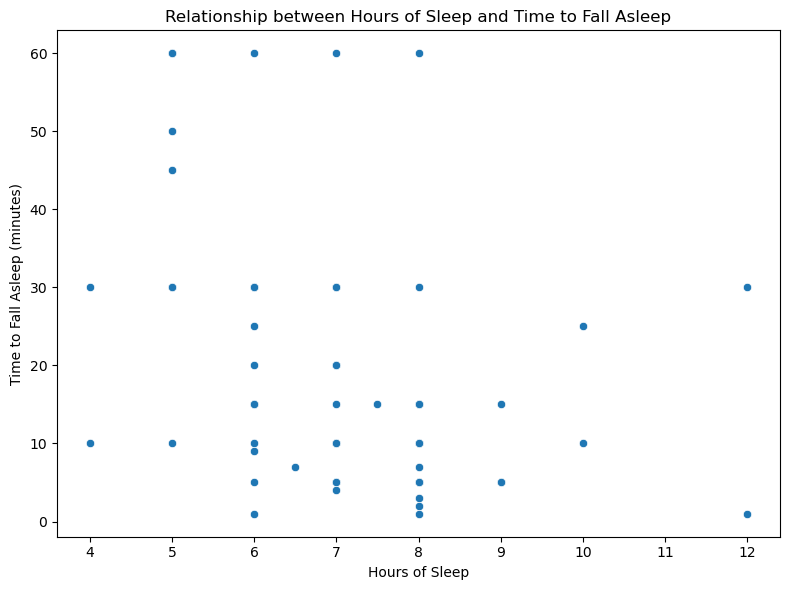

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure and subplot
plt.figure(figsize=(8, 6))

# Create a scatter plot for "Hours of Sleep" vs "How long does it take you to fall asleep (in mins)?"
sns.scatterplot(data=df, x="How much hours of sleep you usually get? ", y="How long does it take you to fall asleep (in mins) ?", palette="Set2")

# Customize the plot
plt.xlabel("Hours of Sleep")
plt.ylabel("Time to Fall Asleep (minutes)")
plt.title("Relationship between Hours of Sleep and Time to Fall Asleep")

# Show the plot
plt.tight_layout()
plt.show()


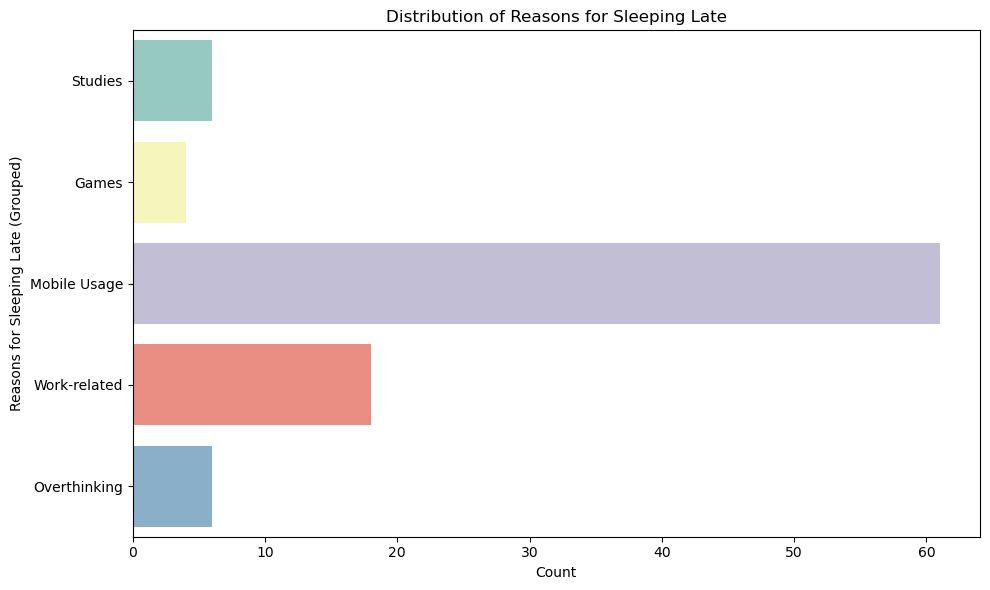

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data from CSV file
csv_file = "DVA_mini" 
df = pd.read_csv(csv_file)

# Preprocess the data: Split multiple reasons and create a list of categories
reasons = df["What makes you sleep late? (Multiple reasons can also be given)"].str.split(', ')
reasons = reasons.explode().str.strip()

# Select top N most common reasons
top_reasons = reasons.value_counts().head(10).index

# Group reasons into broader categories
def group_reason(reason):
    if "mobile" in reason.lower() or "phone" in reason.lower():
        return "Mobile Usage"
    elif "work" in reason.lower():
        return "Work-related"
    elif "overthink" in reason.lower():
        return "Overthinking"
    elif "stud" in reason.lower():
        return "Studies"
    elif "gam" in reason.lower():
        return "Games"
    else:
        return "Mobile Usage"

reasons_grouped = reasons.apply(group_reason)

# Set up the figure and subplot
plt.figure(figsize=(10, 6))

# Define the desired order of categories (customize as needed)
desired_order = ["Studies", "Games", "Mobile Usage", "Work-related", "Overthinking"]

# Create a stacked bar plot
sns.countplot(data=df[df["What makes you sleep late? (Multiple reasons can also be given)"].notna()],
              y=reasons_grouped, palette="Set3", order=desired_order)

# Customize the plot
plt.xlabel("Count")
plt.ylabel("Reasons for Sleeping Late (Grouped)")
plt.title("Distribution of Reasons for Sleeping Late")
plt.tight_layout()

# Show the plot
plt.show()


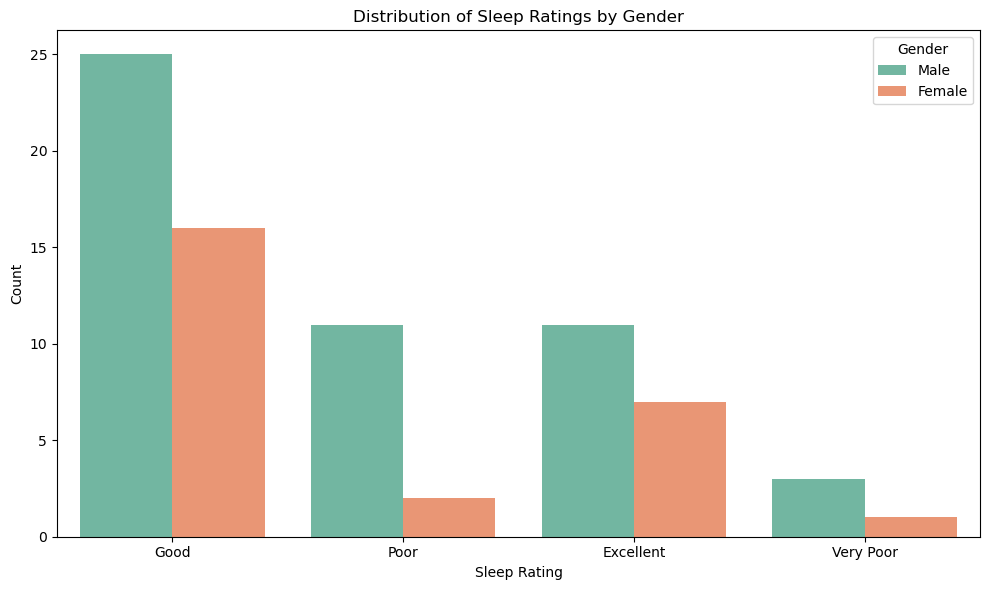

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure and subplot
plt.figure(figsize=(10, 6))

# Create a count plot for sleep ratings within different groups
sns.countplot(data=df, x="How will you rate your sleep?", hue="Gender", palette="Set2")

# Customize the plot
plt.xlabel("Sleep Rating")
plt.ylabel("Count")
plt.title("Distribution of Sleep Ratings by Gender")
plt.legend(title="Gender")
plt.tight_layout()

# Show the plot
plt.show()




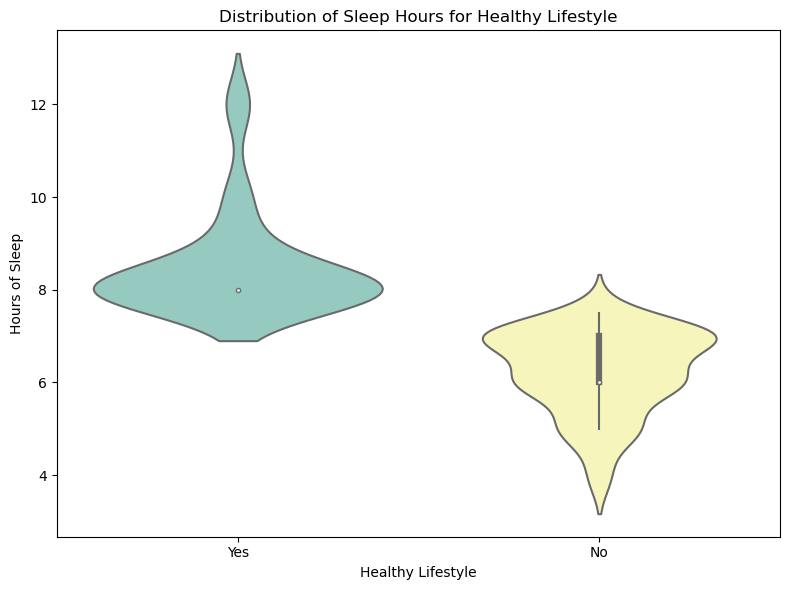

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Set up the figure and subplot
plt.figure(figsize=(8, 6))

# Create a violin plot
sns.violinplot(data=df, x="Sleep Wellness", y="How much hours of sleep you usually get? ", palette="Set3")

# Customize the plot
plt.xlabel("Healthy Lifestyle")
plt.ylabel("Hours of Sleep")
plt.title("Distribution of Sleep Hours for Healthy Lifestyle")

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Select relevant features and target variable
features = [
    "Age",
    "Gender",
    "Currently you are",
    "Do you think you have a sleep problem? ",
    "How will you rate your sleep?",
    "At what time you usually sleep?",
    "When do you usually wake up?",
    "Do you go to bed at the same time every night?",
    "How long does it take you to fall asleep (in mins) ?",
    "What makes you sleep late? (Multiple reasons can also be given)",
    "Do you feel sleepy a lot during the day?",
    "Inspite of having sufficient sleep, do you feel exhausted during the day?"
]
target = "Sleep Wellness"

# Preprocess data
X = df[features]
y = df[target]

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ["Gender", "Currently you are", "Do you think you have a sleep problem? ", "How will you rate your sleep?",
                       "Do you go to bed at the same time every night?",  "At what time you usually sleep?",
                       "When do you usually wake up?","What makes you sleep late? (Multiple reasons can also be given)",
                       "Do you feel sleepy a lot during the day?", "Inspite of having sufficient sleep, do you feel exhausted during the day?"]

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict using trained models
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict using Naive Bayes model
nb_preds = nb_model.predict(X_test)

# Calculate accuracy for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_preds)

# Calculate performance metrics for Logistic Regression
logreg_precision = precision_score(y_test, logreg_preds, pos_label='No')
logreg_recall = recall_score(y_test, logreg_preds, pos_label='Yes')
logreg_f1 = f1_score(y_test, logreg_preds, pos_label='Yes')

# Calculate performance metrics for Random Forest
rf_precision = precision_score(y_test, rf_preds, pos_label='No')
rf_recall = recall_score(y_test, rf_preds, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_preds, pos_label='Yes')

# Calculate performance metrics for Gradient Boosting
gb_precision = precision_score(y_test, gb_preds, pos_label='No')
gb_recall = recall_score(y_test, gb_preds, pos_label='Yes')
gb_f1 = f1_score(y_test, gb_preds, pos_label='Yes')

# Calculate precision, recall, and F1-score for Naive Bayes
nb_precision = precision_score(y_test, nb_preds, pos_label='No')
nb_recall = recall_score(y_test, nb_preds, pos_label='Yes')
nb_f1 = f1_score(y_test, nb_preds, pos_label='Yes')


# Print performance metrics for Logistic Regression
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print("\nLogistic Regression Performance Metrics:")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"F1-Score: {logreg_f1:.2f}\n")

# Print performance metrics for Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Performance Metrics:")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}\n")

# Print performance metrics for Gradient Boosting
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print("\nGradient Boosting Performance Metrics:")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-Score: {gb_f1:.2f}\n")

# Print performance metrics for Naive Bayes
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print("\nNaive Bayes Performance Metrics:")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-Score: {nb_f1:.2f}")



C:\Users\Harish\AppData\Local\Temp\ipykernel_3248\775083759.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.88

Logistic Regression Performance Metrics:
Precision: 0.82
Recall: 0.71
F1-Score: 0.83

Random Forest Accuracy: 0.81

Random Forest Performance Metrics:
Precision: 0.80
Recall: 0.71
F1-Score: 0.77

Gradient Boosting Accuracy: 0.81

Gradient Boosting Performance Metrics:
Precision: 0.88
Recall: 0.86
F1-Score: 0.80

Naive Bayes Accuracy: 0.88

Naive Bayes Performance Metrics:
Precision: 0.82
Recall: 0.71
F1-Score: 0.83


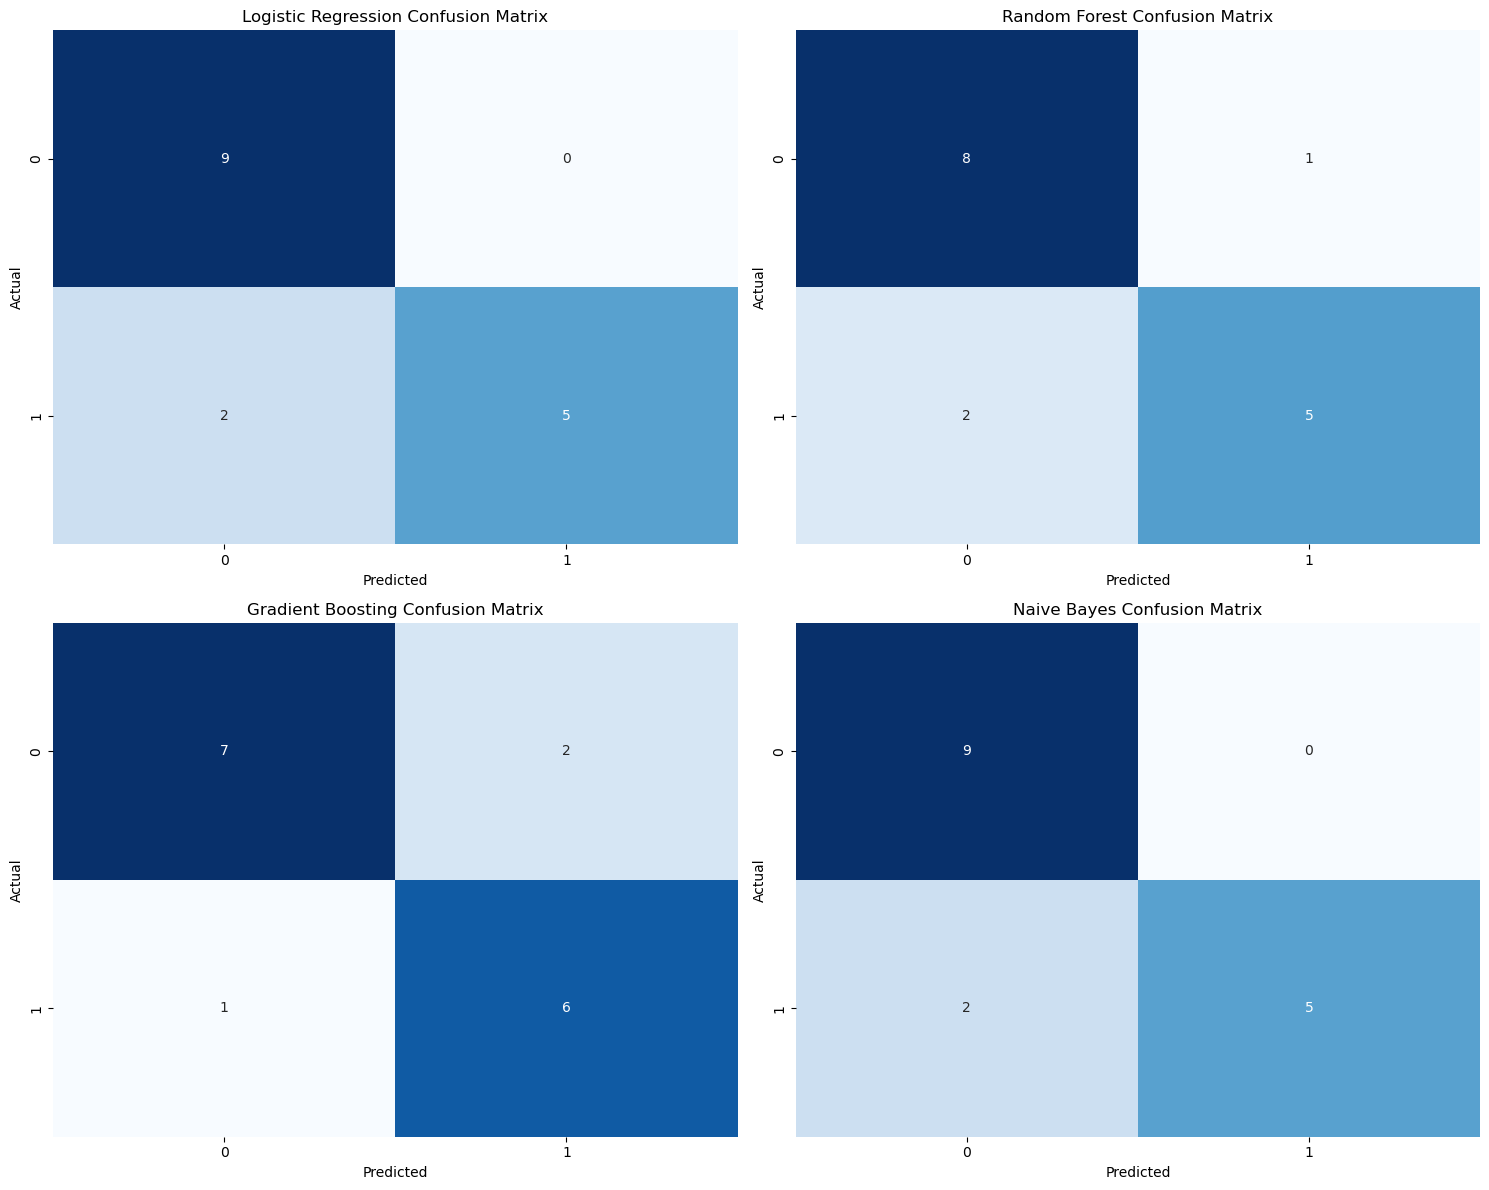

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for each model
logreg_cm = confusion_matrix(y_test, logreg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

# Plot confusion matrices
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 2, 3)
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 2, 4)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


C:\Users\Harish\AppData\Local\Temp\ipykernel_3248\2076167296.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[col] = label_encoder.fit_transform(selected_df[col])


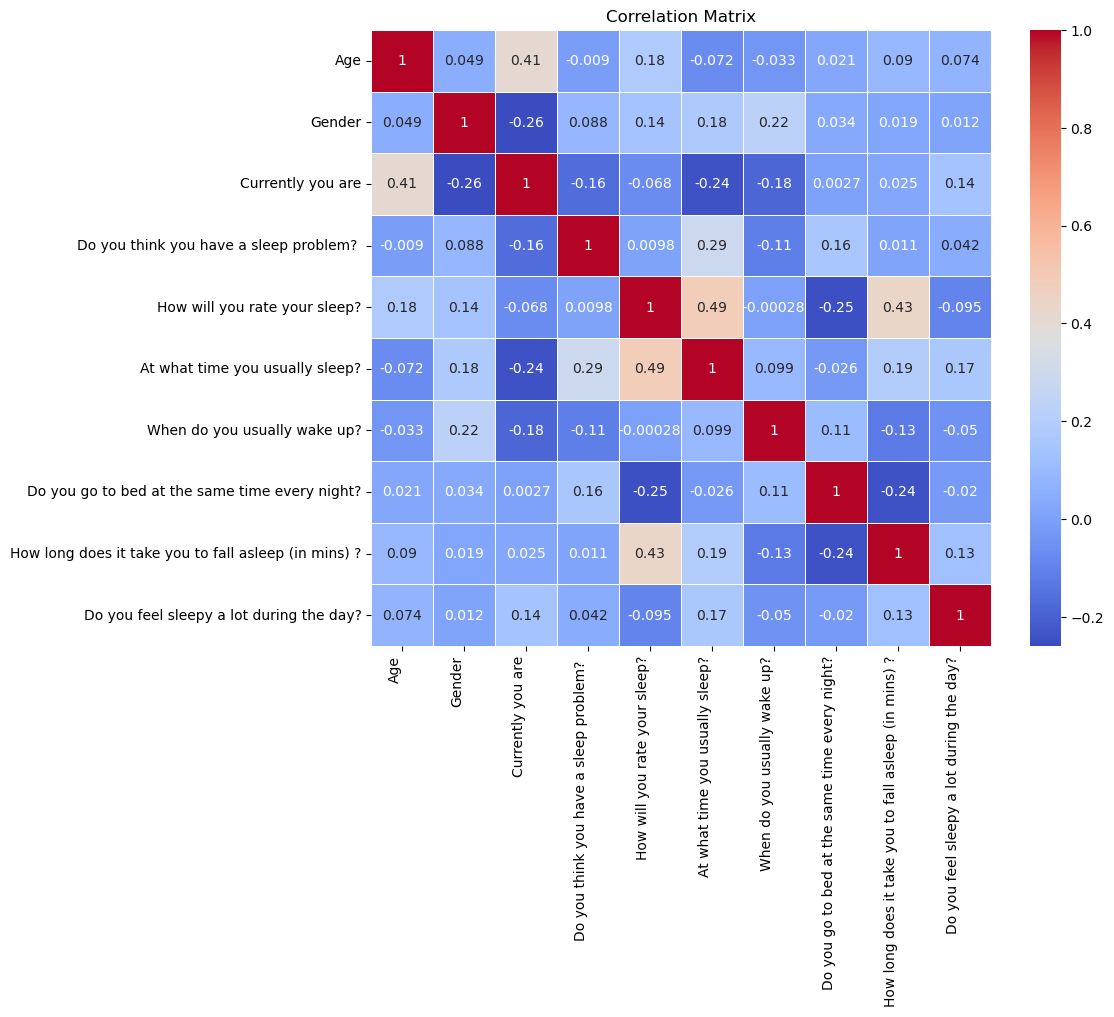

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "DVA_mini"
df = pd.read_csv(csv_file)

# Specify the columns you want to include in the correlation matrix
selected_columns = [
   "Age",
    "Gender",
    "Currently you are",
    "Do you think you have a sleep problem? ",
    "How will you rate your sleep?",
    "At what time you usually sleep?",
    "When do you usually wake up?",
    "Do you go to bed at the same time every night?",
    "How long does it take you to fall asleep (in mins) ?",
    "Do you feel sleepy a lot during the day?",
]

# Subset the DataFrame with selected columns
selected_df = df[selected_columns]

# Convert text columns to numeric using label encoding
label_encoder = LabelEncoder()
for col in selected_df.columns:
    if selected_df[col].dtype == 'object':
        selected_df[col] = label_encoder.fit_transform(selected_df[col])

# Calculate correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")

# Set tick labels manually
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, ha="right")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()


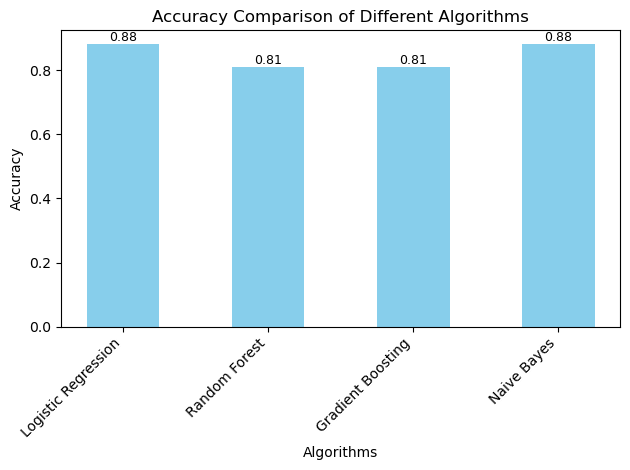

In [20]:
import matplotlib.pyplot as plt

# List of algorithms
algorithms = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Naive Bayes']

# Accuracy values for each algorithm
accuracy = [0.88, 0.81, 0.81, 0.88] 
# Set the positions and width for the bars
pos = list(range(len(algorithms))) 
width = 0.5

# Create the bar chart for accuracy
plt.bar(pos, accuracy, width, color='skyblue')

# Set the x-axis labels and title
plt.xticks(pos, algorithms, rotation=45, ha='right')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')

# Add labels to each bar
for i in range(len(algorithms)):
    plt.text(pos[i], accuracy[i] + 0.001, f"{accuracy[i]:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# Show the plot
plt.tight_layout()
plt.show()
